## Classification Demo

**About the data -** <br>
https://www.kaggle.com/c/bank-marketing-uci <br>
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
<br>
 - The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)
 - Please refer to the above link for variables used and definition
 - The large dataset collected originally had imbalanced classes, however a balanced version was created for research purposes and we will be using that in this lab. Classification on the imbalanced data has low recall.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


In [165]:
# data = pd.ExcelFile("./data/10 Years Financial Data.xlsx")
# data = pd.read_excel("./data/10 Years Financial Data - Copy.csv")
data= pd.read_csv('./data/10 Years Financial Data - Copy.csv', sep = ',')
df = data

In [146]:
#This is the target variable
# data['Depreciation'].value_counts()

# new_header = data.iloc[0] 
# # take the rest of your data minus the header row
# df = data[1:] 
# # set the header row as the df header
# df.columns = new_header 


# df_t = data.T
# new_header = df_t.iloc[0] 
# # take the rest of your data minus the header row
# df = df_t[1:] 
# # set the header row as the df header
# df.columns = new_header 


## EDA

In [166]:

print(data.head())

# print(df_t.info())

   Year  [+]_Revenue  [+] Cost of Revenue  [+] Gross Profit  \
0  2003    1846000.0                  0.0               0.0   
1  2004    2097800.0                  0.0               0.0   
2  2005    2294400.0                  0.0               0.0   
3  2006    2793100.0                  0.0               0.0   
4  2007    3016600.0                  0.0               0.0   

   [+] Share Of Profit Of Associates  \
0                            -5900.0   
1                              500.0   
2                             1900.0   
3                             3300.0   
4                             5000.0   

   [+] Profit Before Tax (Include Exceptional Items)  [+] Profit After Tax  \
0                                           206200.0              155800.0   
1                                           320500.0              245300.0   
2                                           300900.0              239100.0   
3                                           360800.0              28

In [168]:
# df.columns = df.columns.str.strip().str.replace(' ', '_')

# df.keys()
print(df.columns.tolist())

['Year', '[+]_Revenue', '[+]\xa0Cost of Revenue', '[+]\xa0Gross Profit', '[+]\xa0Share Of Profit Of Associates', '[+]\xa0Profit Before Tax (Include Exceptional Items)', '[+]\xa0Profit After Tax', '[+]\xa0Net Earnings', '[+]\xa0Profit Attributable To Shareholders', "[+]\xa0Shareholders' Equity", '[+]\xa0Total Equity, MI & Liabilities', '[+]\xa0Total Assets', '[+]\xa0Operating Cash Flows Before Working Capital Changes', '[+]\xa0Cash Generated From / (Used In) Operations', '[+]\xa0Net Cash Generated From / (Used In) Operating Activities', '[+]\xa0Net Changes In Cash And Cash Equivalents', '[+]\xa0Cash And Cash Equivalents At End', 'Unnamed: 17']


In [169]:
df.describe()

,Year,[+]_Revenue,[+] Cost of Revenue,[+] Gross Profit,[+] Share Of Profit Of Associates,[+] Profit Before Tax (Include Exceptional Items),[+] Profit After Tax,[+] Net Earnings,[+] Profit Attributable To Shareholders,[+] Shareholders' Equity,"[+] Total Equity, MI & Liabilities",[+] Total Assets,[+] Operating Cash Flows Before Working Capital Changes,[+] Cash Generated From / (Used In) Operations,[+] Net Cash Generated From / (Used In) Operating Activities,[+] Net Changes In Cash And Cash Equivalents,[+] Cash And Cash Equivalents At End,Unnamed: 17
count,17.000000,1.700000e+01,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,0.0
mean,2011.000000,3.296494e+06,-1.426818e+06,408305.882353,3423.529412,372911.764706,297870.588235,245423.529412,245423.529412,1.927341e+06,4.242694e+06,4.242694e+06,520158.823529,516800.000000,467976.470588,17835.294118,454817.647059,NaN
std,5.049752,7.138520e+05,1.563764e+06,447136.150225,3335.889951,67931.618948,56313.539277,48049.473585,48049.473585,4.874666e+05,9.807373e+05,9.807373e+05,352429.413250,348434.364336,316565.795944,71428.468950,323451.430348,NaN
min,2003.000000,1.846000e+06,-3.200900e+06,0.000000,-5900.000000,206200.000000,155800.000000,133900.000000,133900.000000,1.264100e+06,2.670700e+06,2.670700e+06,0.000000,0.000000,0.000000,-179000.000000,0.000000,NaN
25%,2007.000000,3.016600e+06,-3.081700e+06,0.000000,1900.000000,334100.000000,273300.000000,219500.000000,219500.000000,1.482500e+06,3.316100e+06,3.316100e+06,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2011.000000,3.411100e+06,0.000000e+00,0.000000,4300.000000,379200.000000,297500.000000,244600.000000,244600.000000,1.891500e+06,4.589200e+06,4.589200e+06,705400.000000,682000.000000,600200.000000,1500.000000,576700.000000,NaN
75%,2015.000000,3.905700e+06,0.000000e+00,856200.000000,5000.000000,425400.000000,344000.000000,283500.000000,283500.000000,2.335100e+06,5.122000e+06,5.122000e+06,770000.000000,765900.000000,697700.000000,70600.000000,694600.000000,NaN
max,2019.000000,4.111500e+06,0.000000e+00,925500.000000,7700.000000,466600.000000,378400.000000,317100.000000,317100.000000,2.618200e+06,5.379000e+06,5.379000e+06,848800.000000,821600.000000,777500.000000,127600.000000,830600.000000,NaN


**Distribution of class labels(Target)**



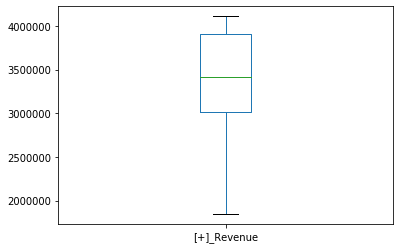

In [170]:
# print("Freq dist of 'y'-How many subscribed to term deposit:\n", 
# df_t['[+] Revenue'].value_counts()
# print("-"*40)

# df.plot()


df[['[+]_Revenue']].plot.box()


**Understand categorical data about customers**

**About thier loan status**

**Bivariate Analysis with respect to target outcome**

**Call duration** <br>
Last contact duration, in seconds (numeric)

In [171]:

print(df['[+]\xa0Gross Profit'])

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9     823200.0
10    856200.0
11    893300.0
12    910600.0
13    925500.0
14    842600.0
15    865800.0
16    824000.0
Name: [+] Gross Profit, dtype: float64


**General Graph**

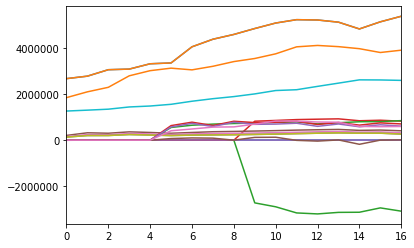

In [172]:
df.plot(legend=None)

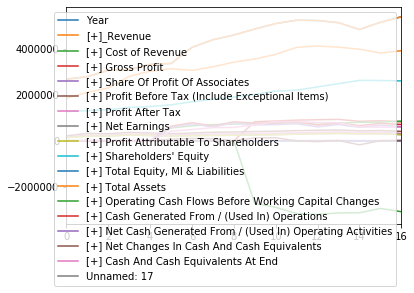

In [173]:
df.plot()
#legend below

**Bubble Plot**

In [180]:
alt.Chart(data).mark_circle().encode(
    x="[+]_Revenue",
    y="Year",
    size='[+]\xa0Total Assets',
    tooltip=["[+]\xa0Cost of Revenue"]
#              , '[+]\xa0Gross Profit', '[+]\xa0Share Of Profit Of Associates', 
#              '[+]\xa0Profit Before Tax (Include Exceptional Items)', '[+]\xa0Profit After Tax', 
#              '[+]\xa0Net Earnings', '[+]\xa0Profit Attributable To Shareholders', 
#              "[+]\xa0Shareholders' Equity", '[+]\xa0Total Equity, MI & Liabilities', 
#              '[+]\xa0Operating Cash Flows Before Working Capital Changes', 
#              '[+]\xa0Cash Generated From / (Used In) Operations', 
#              '[+]\xa0Net Cash Generated From / (Used In) Operating Activities', 
#              '[+]\xa0Net Changes In Cash And Cash Equivalents', 
#              '[+]\xa0Cash And Cash Equivalents At End']
).configure_mark(
    color='red'
).interactive()

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [164]:
df.plot(kind='scatter', x='[+]_Revenue', y='Year', c='red', cmap='coolwarm')




KeyError: 'Year'

In [31]:
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

**Default and loan**

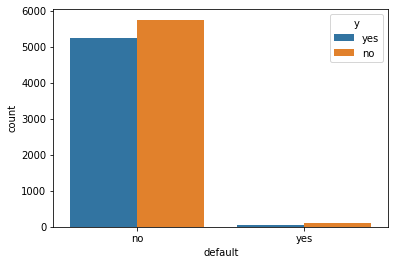

In [33]:
c1 = sns.countplot(x = 'default', data = data, hue = 'y')

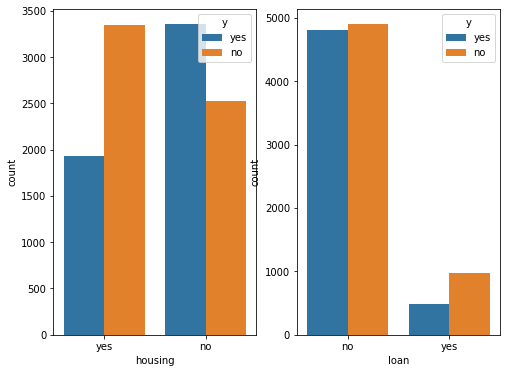

In [35]:
fig, ax = plt.subplots(1, 2 , figsize = (8,6))
sns.countplot(x = 'housing', hue = data['y'], data = data, ax=ax[0])
sns.countplot(x = 'loan', hue = data['y'], data = data, ax=ax[1])


**Past and present Campaign related**

**Outcome of previous marketing campaign**

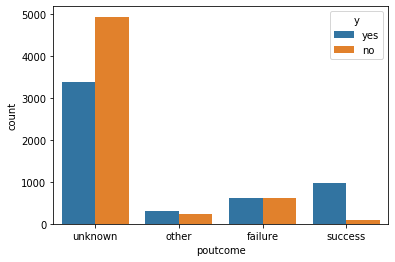

In [36]:
sns.countplot(x = 'poutcome', hue = data['y'], data = data)

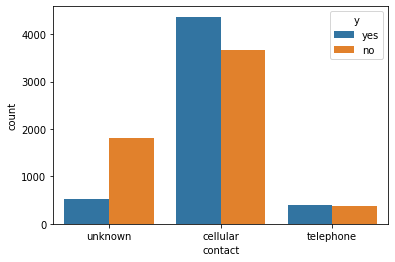

In [38]:
sns.countplot(x = 'contact', hue = data['y'], data = data)

**pdays** <br>
Number of days that passed by after the client was last contacted from a previous campaign(999 = no previous contact)

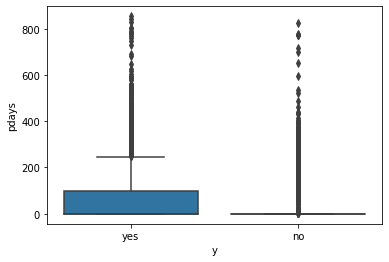

In [39]:
sns.boxplot(x = data['y'], y = data['pdays'])

**previous:**<br>
number of contacts performed before this campaign and for this client

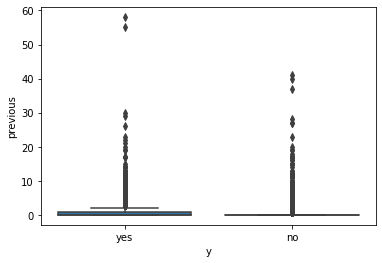

In [71]:
sns.boxplot(x = data['y'], y = data['previous'])

**Summarise Key findings from EDA on who subscribed**

<br>**Demographics** <br>
 - Age distribution is wide. Mean age for both class labels are close. More elderly, old age, retired have also subscribed
 - Most who subscribed had secondary and tertiary education
 - Marital status across have subscribed
 - Customers with Management, retired, technician, admin and student subscribed more<br>

**loans and default**<br>
 - Most do not have credit default
 - Most did not have personal loan. Whereas both category of customers with and without housing loans have subscribed

**Contact, past campaign related**<br>

 - Outcome of previous marketing campaign for most subscribers is unknown
 - Those subscribed have more number of contacts from bank in the past
 - Call duration has a direct impact on the outcome. Duration of last call was longer for class = 'yes'
 - Cellular mode of contact seems popular and successful (or may be correlated to jobs/education)
 - pdays- seems like customers who have not been contacted for a while since last campaign are being contacted now
 - Excluding day and month of last contact from analysis


### Data Preparation before Modeling<br>
Below are the steps we implement in the first round of analysis - <Br>

1. Age binning
2. pdays negative value to be set to 999
2. Grouping of jobs to reduce categories
3. Creating dummy variables for categorical data inputs

In [42]:
#binning of ages.

data.loc[data['age'] <= 35, 'age1'] = 'young-mid'
data.loc[(data['age'] > 35) & (data['age'] <= 50), 'age1'] = 'Mid-old'
data.loc[(data['age'] > 50) & (data['age'] <= 70), 'age1'] = 'old1'
data.loc[(data['age'] > 70) & (data['age'] <= 98), 'age1'] = 'old2'

In [44]:
data['age1'].value_counts()

young-mid    4371
Mid-old      4320
old1         2198
old2          273
Name: age1, dtype: int64

In [45]:
#grouping of job categories

data['job'] = data['job'].replace(['management', 'admin.','services'], 'white-collar')
data['job'] = data['job'].replace(['technician'], 'blue-collar')
data['job'] = data['job'].replace(['student','retired','self-employed'], 'others-1')
data['job'] = data['job'].replace(['unemployed', 'unknown'], 'others-2')

In [46]:
data['job'].value_counts()

white-collar    4823
blue-collar     3767
others-1        1543
others-2         427
entrepreneur     328
housemaid        274
Name: job, dtype: int64

In [88]:
#pdays -1 = 999

data.loc[data['pdays'] <0, 'pdays'] = 999

In [90]:
#We will analyse without these variables first. And age has been binned so drop the numeric age
data1 = data.drop(['day', 'month', 'duration', 'age' ], axis = 1)

In [92]:
data1.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'age1'],
      dtype='object')

**Dummy variables and encoding**

In [93]:
outcome = {'yes': 1, 'no':0}
data1['class'] = data1['y'].map(outcome)

In [94]:
#data1['class'].value_counts()
data1.drop('y',  axis = 1, inplace= True)

In [57]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 13 columns):
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
age1         11162 non-null object
class        11162 non-null int64
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [95]:
data2 = pd.get_dummies(data = data1, columns = ['job', 'marital', 'education', 'default',\
                                                'housing','loan','contact', 'poutcome', 'age1']) # drop_first = True)

In [48]:
data2.head()

,campaign,pdays,previous,class,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age1_Mid-old,age1_old1,age1_old2,age1_young-mid
0,1,999,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,1,999,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1,999,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,999,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2,999,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [74]:
#print(data2.head())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 34 columns):
campaign               11162 non-null int64
pdays                  11162 non-null int64
previous               11162 non-null int64
class                  11162 non-null int64
job_blue-collar        11162 non-null uint8
job_entrepreneur       11162 non-null uint8
job_housemaid          11162 non-null uint8
job_others-1           11162 non-null uint8
job_others-2           11162 non-null uint8
job_white-collar       11162 non-null uint8
marital_divorced       11162 non-null uint8
marital_married        11162 non-null uint8
marital_single         11162 non-null uint8
education_primary      11162 non-null uint8
education_secondary    11162 non-null uint8
education_tertiary     11162 non-null uint8
education_unknown      11162 non-null uint8
default_no             11162 non-null uint8
default_yes            11162 non-null uint8
housing_no             11162 non-null uint8
housing_yes

### Classification Models

**Decision Tree classifier**

In [97]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [107]:
# Get the predictors and target; the x and y variables from the dataset
x = data2.drop(columns= 'class')
y = data2['class']
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


**Split the data into train and test, Fit model and predict on test data**

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 1)
#print(x_train)
# Instantiate dt and criterion can be gini or entropy
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
    
# Fit dt to the training set
dt.fit(X_train, y_train) 

# Predict test set labels
y_pred = dt.predict(X_test)
# print(y_pred)

**Display the tree**

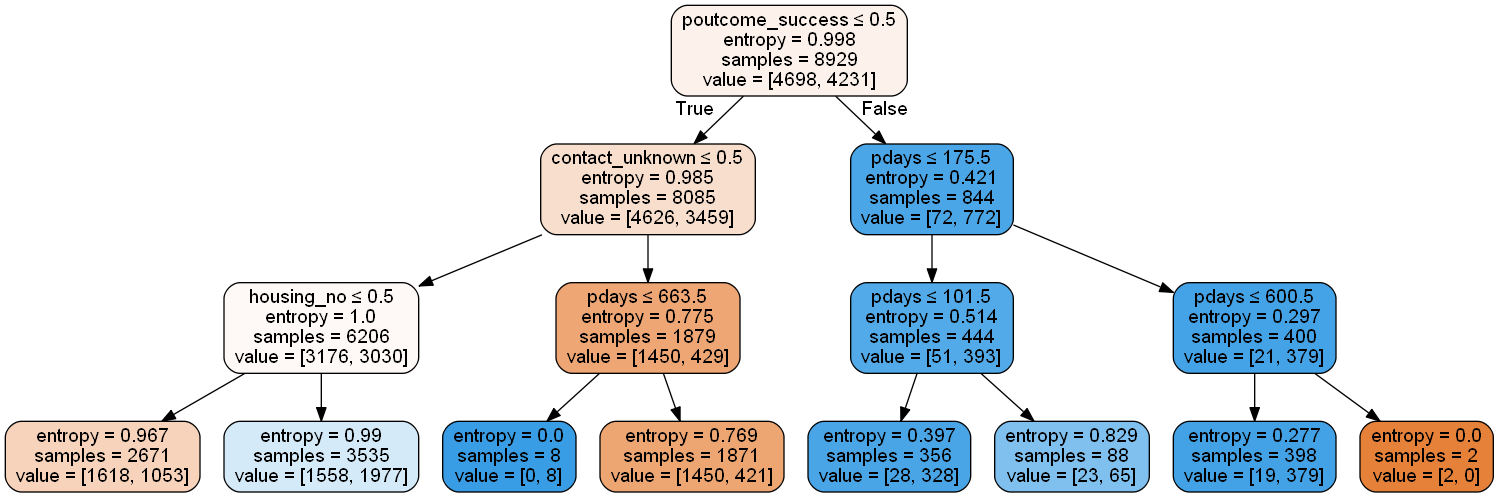

In [121]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = x.columns

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bankTree.png')
Image(graph.create_png())

In [65]:
y_train.value_counts()

0    4698
1    4231
Name: class, dtype: int64

**Model evaluation metrics -**

In [105]:
#Print the accuracy of labels predicted.

print("Accuracy for Decision Tree :")
print(round(accuracy_score(y_test, y_pred), 3))

Accuracy for Decision Tree :
0.644


In [67]:
#Label counts in test

y_test.value_counts()

0    1175
1    1058
Name: class, dtype: int64

In [68]:
#Confusion matrix
# label = 1 = subscribed to term deposit 

from sklearn.metrics import confusion_matrix

#cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
print(cnf_matrix)

[[697 361]
 [434 741]]


In [69]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)

print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))

Specificity : 0.63
Precision : 0.62
Recall or Sensitivity : 0.66


<font color = 'blue'> 
**Findings on model evaluation**<br>
1. The precision and recall seems acceptable to start with. We should try to improve it further.

**Important Features** <br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [70]:
vi = dt.feature_importances_

n = len(feature_cols)
for i in range(0,n):
    print(feature_cols[i] + '   :',vi[i].round(3))

campaign   : 0.0
pdays   : 0.045
previous   : 0.0
job_blue-collar   : 0.0
job_entrepreneur   : 0.0
job_housemaid   : 0.0
job_others-1   : 0.0
job_others-2   : 0.0
job_white-collar   : 0.0
marital_divorced   : 0.0
marital_married   : 0.0
marital_single   : 0.0
education_primary   : 0.0
education_secondary   : 0.0
education_tertiary   : 0.0
education_unknown   : 0.0
default_no   : 0.0
default_yes   : 0.0
housing_no   : 0.113
housing_yes   : 0.0
loan_no   : 0.0
loan_yes   : 0.0
contact_cellular   : 0.0
contact_telephone   : 0.0
contact_unknown   : 0.285
poutcome_failure   : 0.0
poutcome_other   : 0.0
poutcome_success   : 0.557
poutcome_unknown   : 0.0
age1_Mid-old   : 0.0
age1_old1   : 0.0
age1_old2   : 0.0
age1_young-mid   : 0.0


**Check performace with LogisticRegression**

In [71]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression(solver = 'liblinear', random_state = 1)

lmodel.fit(X_train,y_train)
y_pred1 = lmodel.predict(X_test)



print("Accuracy for LogisticRegression :")
print(round(accuracy_score(y_test, y_pred1),2))

Accuracy for LogisticRegression :
0.69


In [72]:
print(confusion_matrix(y_test, y_pred1, labels = [1,0]))

[[666 392]
 [293 882]]


In [73]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)

print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))

Specificity : 0.75
Precision : 0.69
Recall or Sensitivity : 0.63


<font color = 'blue'> 
**Findings on model evaluation**<br>
We see some improvements with LogisticRegression. The precision and specificity improved but recall dropped

**Check performace with RandomForest** <br>

**Note: We are not fine tuning parameters here but calling the classifier with defaults. Depending on the usecase and the prediction goal careful understanding of parameters are required for fine tuning**

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)#, class_weight='balanced_subsample')#criterion = entopy,gini
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)

print("Printing accuracy of random forest :")
print(round(accuracy_score(y_test, y_pred2),2))

Printing accuracy of random forest :
0.65


In [75]:
print(confusion_matrix(y_test, y_pred2))

[[789 386]
 [391 667]]


In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)

print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))

Specificity : 0.67
Precision : 0.63
Recall or Sensitivity : 0.63
